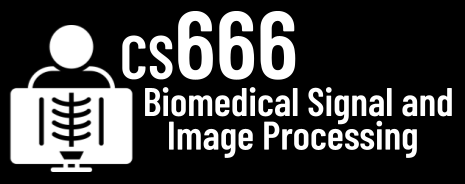

# Assignment 1

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [6]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset. Note: this might fail with an import error, but should be an easy fix :)

In [19]:
!wget https://cs666.org/data/ecg.txt -O ./sample_data/ecg.txt

--2026-02-18 22:49:59--  https://cs666.org/data/ecg.txt
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105085 (103K) [text/plain]
Saving to: ‘./sample_data/ecg.txt’

./sample_data/ecg.t 100%[===================>] 102.62K  --.-KB/s    in 0.05s   

2026-02-18 22:49:59 (1.96 MB/s) - ‘./sample_data/ecg.txt’ saved [105085/105085]



In [14]:
!pip install peakutils
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [36]:
SAMPLING_RATE = 1000
SECONDS = 15000/SAMPLING_RATE # 15s

15.0


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

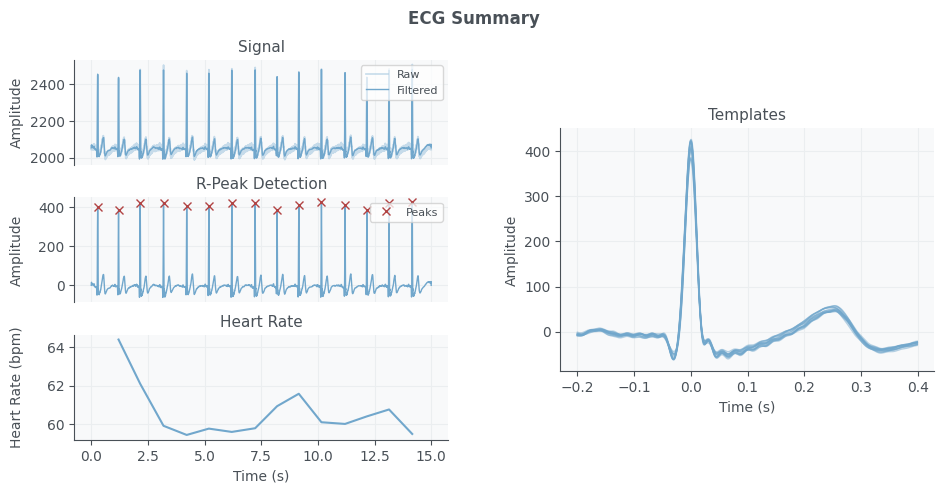

In [44]:
from biosppy.signals import ecg
import numpy as np

ecg_data = np.loadtxt('./sample_data/ecg.txt', skiprows=4)

out = ecg.ecg(signal=ecg_data, sampling_rate=SAMPLING_RATE)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

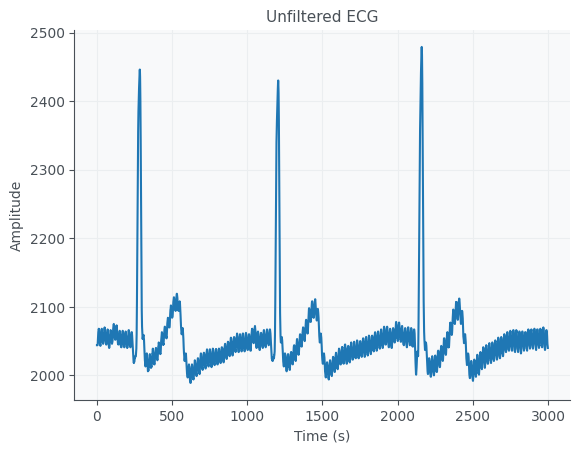

In [48]:
SAMPLES_3S = 3 * SAMPLING_RATE # 3000

plt.plot(ecg_data[:SAMPLES_3S])
plt.title('Unfiltered ECG')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

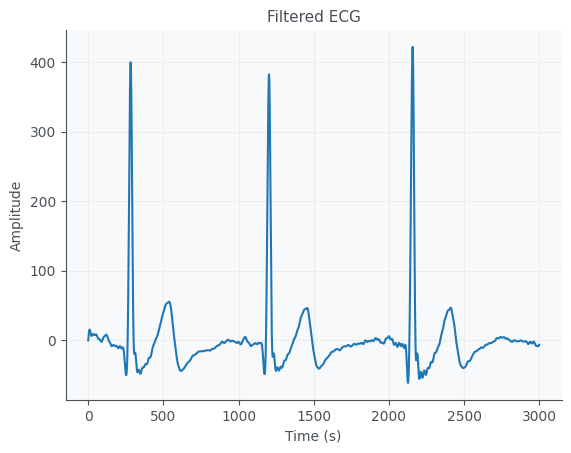

In [47]:
filtered_graph = out['filtered']

plt.plot(filtered_graph[:SAMPLES_3S])
plt.title('Filtered ECG')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

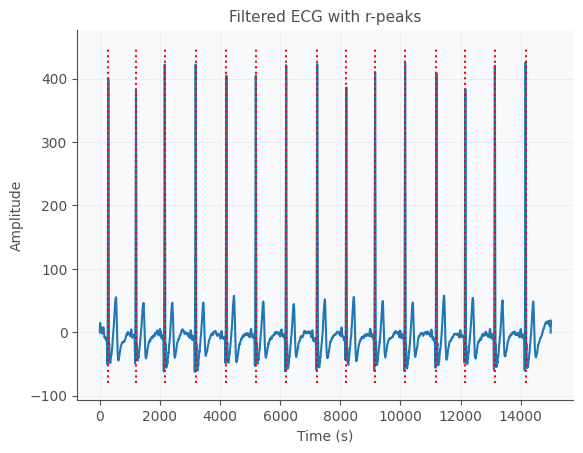

In [66]:
r_peaks = out['rpeaks']

plt.plot(filtered_graph)
plt.title('Filtered ECG with r-peaks')

plt.vlines(x=r_peaks, color = 'r', ls=':', ymin=-80, ymax=450)

plt.title('Filtered ECG with r-peaks')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [11]:
!pip install neurokit2
import neurokit2 as nk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 13.3 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

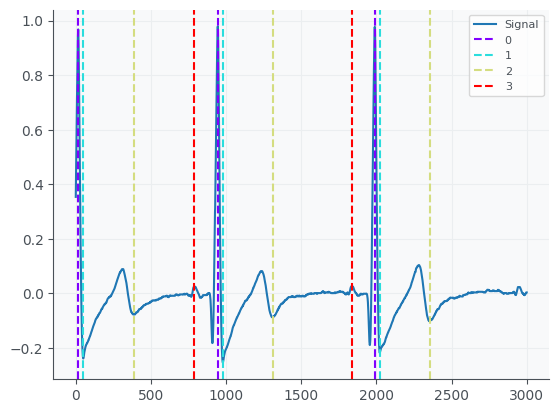

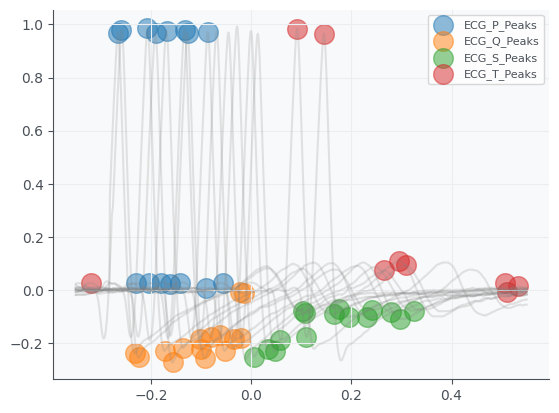

In [127]:
# We know the R spikes now but what about P Q S T waves?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

ecg_signal = nk.data(dataset=f"ecg_{SAMPLING_RATE}hz")

_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks=r_peaks, sampling_rate=SAMPLING_RATE, method="peak")

plot = nk.events_plot([waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3],
                       waves_peak['ECG_T_Peaks'][:3]
                       ], ecg_signal[:SAMPLES_3S])

_, waves_peak = nk.ecg_delineate(ecg_signal,
                                 rpeaks=r_peaks,
                                 sampling_rate=SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [ ]:
'''
 The detection was decent, there were some errors with the T-peak in the first
 graph being plotted after the actual peak and instead during a dip.
 The P-Peaks were accurate in the first graph but not the second, the R and S
 peaks were also accurate in the first graph, the second graph is a bit more
 difficult to tell due to all of the overlapping lines however S and Q peaks do
 look accurate.
'''

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [82]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

!pip install sleepecg
import sleepecg

rpeaks = sleepecg.detect_heartbeats(ecg_data, fs=SAMPLING_RATE)

print(rpeaks)

[  282  1202  2157  3187  4210  5187  6199  7231  8199  9156 10154 11197
 12158 13138 14161]


In [83]:
print(f"sleepecg: {rpeaks}")
print(f"Biosppy: {r_peaks}")



sleepecg: [  282  1202  2157  3187  4210  5187  6199  7231  8199  9156 10154 11197
 12158 13138 14161]
Biosppy: [  282  1203  2158  3187  4210  5187  6199  7231  8199  9156 10155 11197
 12158 13138 14161]


In [109]:
# Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
'''
They give nearly identical results with the same number of r-peaks and the only
differences being in index 1, 2, and 10 and sleepecg was only higher by 1.
'''

<class 'dict'>
<class 'numpy.ndarray'>


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

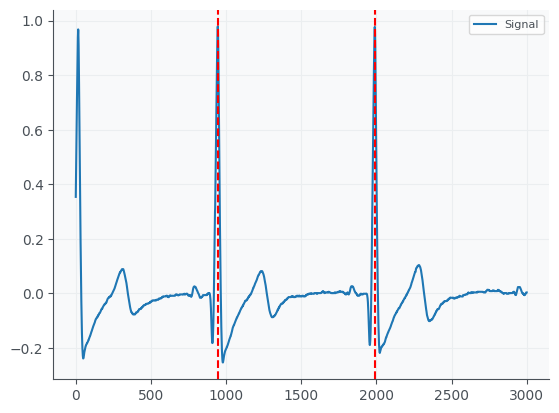

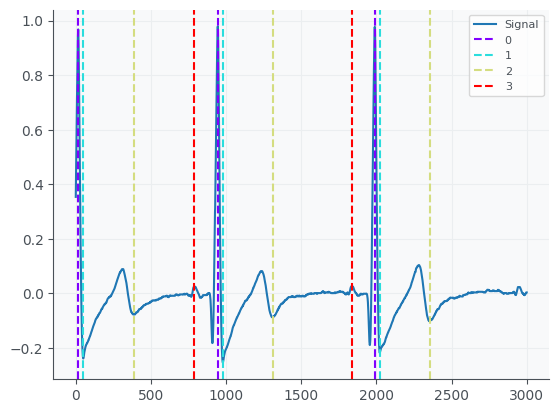

In [126]:
# Use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks=r_peaks, sampling_rate=SAMPLING_RATE, method="peak")
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=SAMPLING_RATE)

plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:2], ecg_signal[:SAMPLES_3S])

plot = nk.events_plot([waves_peak['ECG_P_Peaks'][:3], waves_peak['ECG_Q_Peaks'][:3], waves_peak['ECG_S_Peaks'][:3], waves_peak['ECG_T_Peaks'][:3]], ecg_signal[:SAMPLES_3S])

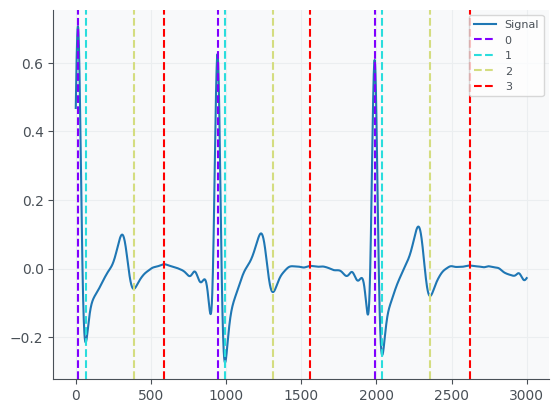

In [129]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

nk_filtered_signal = nk.signal_filter(ecg_signal, sampling_rate=SAMPLING_RATE, lowcut=0.5, highcut=20, method="butterworth")

_, waves_peak = nk.ecg_delineate(nk_filtered_signal, rpeaks=r_peaks, sampling_rate=SAMPLING_RATE, method="peak")

plot = nk.events_plot([waves_peak['ECG_P_Peaks'][:3], waves_peak['ECG_Q_Peaks'][:3], waves_peak['ECG_S_Peaks'][:3], waves_peak['ECG_T_Peaks'][:3]], nk_filtered_signal[:SAMPLES_3S])


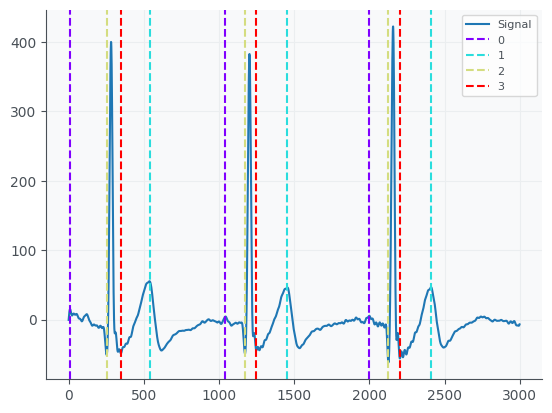

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

_, filtered_waves_peak = nk.ecg_delineate(filtered_graph, rpeaks=r_peaks, sampling_rate=SAMPLING_RATE, method="peak")

plot = nk.events_plot([filtered_waves_peak['ECG_P_Peaks'][:3],  filtered_waves_peak['ECG_Q_Peaks'][:3], 
                       filtered_waves_peak['ECG_S_Peaks'][:3], filtered_waves_peak['ECG_T_Peaks'][:3]], filtered_graph[:SAMPLES_3S])

In [ ]:
# TODO Which one works the best?

'''
The bioSPPY works best since its more automatic and you don't need to fine tune
the filter in order to get a more accurate representation of the peaks
'''

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#